<a href="https://colab.research.google.com/github/sshahbazak/SEPRepo/blob/brett_branch/BrettRestart61724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries (gower, geomstats, & plotly)

In [ ]:
!pip install gower geomstats plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 37.7 MB/s eta 0:00:00


# Add imports

In [ ]:
import numpy as np
import pandas as pd
import gower
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.learning.kmeans import RiemannianKMeans
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from scipy import stats

INFO:root:Using numpy backend


# Add Data File

In [733]:
# Load data from csv file

df = pd.read_csv('L1_TESTS_FINAL_SUBMISSION.csv')

# Rename Columns

In [734]:
df.rename(columns={'MSN State': 'msn_state'}, inplace=True)
df.rename(columns={'Mode': 'mode'}, inplace=True)
df.rename(columns={'GF': 'gf'}, inplace=True)
df.rename(columns={'GFPRED': 'gf_pred'}, inplace=True)
df.rename(columns={'GFACT': 'gf_act'}, inplace=True)
df.rename(columns={'Wind': 'wind'}, inplace=True)

# Change data to seconds

In [735]:
df['duration'] = pd.to_timedelta(df['duration']).dt.total_seconds()

# Data Analysis

In [736]:
# Displays unique values for each column

unique_values = df.apply(lambda x: x.unique())
print(unique_values)

Unnamed: 0             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
mode                                               [OFFBOARD, AUTO.LAND]
msn_state              [Flying, Land, Disarm, Takeoff, Arm, Hover, Re...
wind                                                      [nan, 5 North]
gf                                                             [Yes, No]
gf_pred                                                   [No, Yes, nan]
gf_act                 [Return mode, Hold mode, Warning, Land mode, nan]
kill_switch                                                    [No, Yes]
mode_switch            [POSCTL, STABILIZED, OFFBOARD, ALTCTL, AUTO.LO...
throttle               [0.0, 225.0, -100.0, 260.0, 600.0, 100.0, 550....
max_deviation          [14.73085616, 14.76118354, 0.16044742, 14.7897...
max_altitude           [8.43568, 8.218861, 12.619712, 8.455968, 16.14...
duration               [35.0, 87.0, 76.0, 105.0, 77.0, 25.0, 98.0, 14...
final_landing_state                                

In [737]:
# Displays count for unique values for each column

unique_counts = df.apply(lambda x: x.nunique())
print(unique_counts)

Unnamed: 0             705
mode                     2
msn_state                7
wind                     1
gf                       2
gf_pred                  2
gf_act                   4
kill_switch              2
mode_switch              7
throttle                13
max_deviation          705
max_altitude           703
duration               117
final_landing_state      2
freefall_occurred        2
mission_complete         2
dtype: int64


In [740]:
# Displays unique values for msn_state

msn_state_values = sorted(df['msn_state'].unique())

msn_state_value_count = df['msn_state'].value_counts()

def df_msn_state():
  print(f"Mission state values for data set")
  print(msn_state_values)
  print()
  print(f"Count for data set column")
  print(msn_state_value_count)

df_msn_state()

Mission state values for data set
['Arm', 'Disarm', 'Flying', 'Hover', 'Land', 'ReceiveMission', 'Takeoff']

Count for data set column
msn_state
Flying            322
Land               84
Takeoff            84
Hover              84
Arm                83
Disarm             47
ReceiveMission      1
Name: count, dtype: int64


In [742]:
# Displays unique values for mode_switch

mode_switch_values = sorted(df['mode_switch'].unique())

mode_switch_value_count = df['mode_switch'].value_counts()

def df_mode_switch():
  print(f"Mode switch values for data set")
  print(mode_switch_values)
  print()
  print(f"Count for data set column")
  print(mode_switch_value_count)

df_mode_switch()

Mode switch values for data set
['ALTCTL', 'AUTO.LAND', 'AUTO.LOITER', 'AUTO.RTL', 'OFFBOARD', 'POSCTL', 'STABILIZED']

Count for data set column
mode_switch
OFFBOARD       128
POSCTL         127
STABILIZED     126
ALTCTL         125
AUTO.RTL        67
AUTO.LOITER     66
AUTO.LAND       66
Name: count, dtype: int64


In [749]:
# Displays unique values for throttle

df['throttle'] = pd.to_numeric(df['throttle'], errors='coerce')
min_value = df['throttle'].min()
max_value = df['throttle'].max()

throttle_range = (f"{min_value} to {max_value}")
throttle_values = sorted(df['throttle'].unique())

throttle_value_count_including_nan = df['throttle'].value_counts(dropna=False)
throttle_count = len(df['throttle'])

def df_throttle():
  print(f"Throttle range for data set")
  print(throttle_range)
  print()
  print(f"Throttle values for data set")
  print(throttle_values)
  print()
  print(f"Count for throttle column")
  print(throttle_count)
  print()
  print(f"Count for data set column")
  print(throttle_value_count_including_nan)

df_throttle()

Throttle range for data set
-100.0 to 615.0

Throttle values for data set
[-100.0, 0.0, 100.0, 225.0, 260.0, 300.0, 435.0, 445.0, 450.0, 550.0, 570.0, 600.0, 615.0, nan]

Count for throttle column
705

Count for data set column
throttle
 0.0      125
 NaN       80
 550.0     71
 260.0     70
 600.0     70
 615.0     70
-100.0     32
 100.0     32
 570.0     32
 300.0     32
 225.0     23
 445.0     23
 435.0     23
 450.0     22
Name: count, dtype: int64


In [745]:
# Displays unique values for max_deviation


min_value = df['max_deviation'].min()
max_value = df['max_deviation'].max()

max_deviation_values = sorted(df['max_deviation'].unique())
max_deviation_range = (f"{min_value} to {max_value}")

max_deviation_value_count = df['max_deviation'].value_counts()

def df_max_deviation():
  print(f"Max Deviation range for data set")
  print(max_deviation_range)
  print()
  print(f"Max deviation values for data set")
  print(max_deviation_values)
  print()
  print(f"Count for data set column")
  print(max_deviation_value_count)

df_max_deviation()


Max Deviation range for data set
0.0095919999999978 to 35.0613792

Max deviation values for data set
[0.0095919999999978, 0.0097389999999997, 0.0098229999999972, 0.0099160000000004, 0.0099659999999985, 0.0101300000000001, 0.0109630000000038, 0.0137134999999997, 0.0175830000000019, 0.0184229999999985, 0.02273087, 0.02804394, 0.0306360000000012, 0.0403900000000021, 0.05518414, 0.05782853, 0.05786614, 0.0578984, 0.0593267, 0.0611323999999999, 0.0637469999999993, 0.0647116, 0.06632344, 0.06814943, 0.0700648999999999, 0.07073273, 0.0756015000000001, 0.07641567, 0.07860011, 0.0793189999999981, 0.08004382, 0.0818071, 0.0828203, 0.0831854999999999, 0.08574145, 0.08972058, 0.0898201999999999, 0.09025359, 0.0910948999999999, 0.09157191, 0.094212, 0.0953961999999999, 0.09589577, 0.0964876999999999, 0.09721412, 0.0977129000000001, 0.0980958, 0.0981248999999999, 0.0995337499999999, 0.10365257, 0.1045928, 0.10604796, 0.10951187, 0.109998, 0.11116877, 0.11248358, 0.11283, 0.11440697, 0.1146293, 0.114

In [ ]:
# Displays unique values for max_altitude

min_value = df['max_altitude'].min()
max_value = df['max_altitude'].max()

max_altitude_range = (f"{min_value} to {max_value}")
max_altitude_values = sorted(df['max_altitude'].unique())

def df_max_altitude():
  print(f"Max altitude range for data set")
  print(max_altitude_range)
  print()
  print(f"Max altitude values for data set")
  print(max_altitude_values)
  print()
  print(f"Max alititude unique count for data set")

df_max_altitude()


Max altitude range for Data set
8.634119e-05 to 93.55165

Max altitude values for Data set
[8.634119e-05, 0.0056544524, 0.005725088, 0.0059559518, 0.00658153, 0.007945622, 0.008584153, 0.0099603105, 0.011432759, 0.012227646, 0.012725356, 0.015473273, 0.016029352, 0.017431905, 0.017729716, 0.021983515, 0.022727542, 0.02274483, 0.026390966, 0.027298797, 0.027904093, 0.029044293, 0.031038737, 0.03202238, 0.036243465, 0.03671271, 0.040255275, 0.041128967, 0.04536677, 0.04600167, 0.04827103, 0.04993805, 0.051939182, 0.055859968, 0.058302883, 0.058710605, 0.060921956, 0.06468675, 0.07049385, 0.074913755, 0.0794536, 0.08206194, 0.08589076, 0.08739368, 0.1031686, 0.106898904, 0.10795968, 0.11366269, 0.120542064, 0.13567868, 0.13791916, 0.1390225, 0.14184768, 0.14582232, 0.14973898, 0.2543773, 0.2864738, 0.3325558, 0.38804713, 1.5700978, 2.2428615, 2.4118614, 2.509105, 2.5157478, 2.523381, 2.53857, 2.5808573, 2.5946672, 2.617556, 2.6214242, 2.6541257, 2.7582026, 2.8146157, 2.8165228, 2.8186758,

In [ ]:
# Displays unique values for duration

min_value = df['duration'].min()
max_value = df['duration'].max()

duration_range = (f"{min_value} to {max_value}")
duration_values = sorted(df['duration'].unique())

def df_duration():
  print(f"Duration range for data set")
  print(duration_range)
  print()
  print(f"Duration values for data set")
  print(duration_values)
  print()
  print(f"Duration unique count for data set")

df_duration()



Duration range for Data set
10.0 to 40178.0

Duration values for Data set
[10.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 35.0, 37.0, 39.0, 41.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 55.0, 58.0, 59.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 117.0, 119.0, 122.0, 128.0, 129.0, 130.0, 132.0, 134.0, 135.0, 143.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 160.0, 162.0, 164.0, 166.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 178.0, 179.0, 185.0, 188.0, 193.0, 194.0, 205.0, 255.0, 256.0, 289.0, 290.0, 312.0, 338.0, 360.0, 519.0, 602.0, 2699.0, 40178.0]


# Data cleaning

In [ ]:
df.fillna(value='None', inplace=True)

In [ ]:
# Check for null values

pd.isnull(df).sum()

Unnamed: 0             0
mode                   0
msn_state              0
wind                   0
gf                     0
gf_pred                0
gf_act                 0
kill_switch            0
mode_switch            0
throttle               0
max_deviation          0
max_altitude           0
duration               0
final_landing_state    0
freefall_occurred      0
mission_complete       0
dtype: int64

# Data normalization

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df['mode'] = le.fit_transform(df['mode'])
# df['msn_state'] = le.fit_transform(df['msn_state'])
# df['wind'] = le.fit_transform(df['wind'])
# df['gf'] = le.fit_transform(df['gf'])
# df['gf_pred'] = le.fit_transform(df['gf_pred'])
# df['gf_act'] = le.fit_transform(df['gf_act'])
# df['kill_switch'] = le.fit_transform(df['kill_switch'])
# df['mode_switch'] = le.fit_transform(df['mode_switch'])
# #df['throttle'] = le.fit_transform(df['throttle'])

# df['max_deviation'] = le.fit_transform(df['max_deviation'])
# df['max_altitude'] = le.fit_transform(df['max_altitude'])
# df['duration'] = le.fit_transform(df['duration'])
# df['final_landing_state'] = le.fit_transform(df['final_landing_state'])
# df['freefall_occurred'] = le.fit_transform(df['freefall_occurred'])
# df['mission_complete'] = le.fit_transform(df['mission_complete'])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# df['mode'] = scaler.fit_transform(df[['mode']])
# df['msn_state'] = scaler.fit_transform(df[['msn_state']])
# df['wind'] = scaler.fit_transform(df[['wind']])
# df['gf'] = scaler.fit_transform(df[['gf']])
# df['gf_pred'] = scaler.fit_transform(df[['gf_pred']])
# df['gf_act'] = scaler.fit_transform(df[['gf_act']])
# df['kill_switch'] = scaler.fit_transform(df[['kill_switch']])
# df['mode_switch'] = scaler.fit_transform(df[['mode_switch']])
# #df['throttle'] = scaler.fit_transform(df[['throttle']])

# df['max_deviation'] = scaler.fit_transform(df[['max_deviation']])
# df['max_altitude'] = scaler.fit_transform(df[['max_altitude']])
# df['duration'] = scaler.fit_transform(df[['duration']])
# df['final_landing_state'] = scaler.fit_transform(df[['final_landing_state']])
# df['freefall_occurred'] = scaler.fit_transform(df[['freefall_occurred']])
# df['mission_complete'] = scaler.fit_transform(df[['mission_complete']])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# df['mode'] = scaler.fit_transform(df[['mode']])
# df['msn_state'] = scaler.fit_transform(df[['msn_state']])
# df['wind'] = scaler.fit_transform(df[['wind']])
# df['gf'] = scaler.fit_transform(df[['gf']])
# df['gf_pred'] = scaler.fit_transform(df[['gf_pred']])
# df['gf_act'] = scaler.fit_transform(df[['gf_act']])
# df['kill_switch'] = scaler.fit_transform(df[['kill_switch']])
# df['mode_switch'] = scaler.fit_transform(df[['mode_switch']])
# #df['throttle'] = scaler.fit_transform(df[['throttle']])

# df['max_deviation'] = scaler.fit_transform(df[['max_deviation']])
# df['max_altitude'] = scaler.fit_transform(df[['max_altitude']])
# df['duration'] = scaler.fit_transform(df[['duration']])
# df['final_landing_state'] = scaler.fit_transform(df[['final_landing_state']])
# df['freefall_occurred'] = scaler.fit_transform(df[['freefall_occurred']])
# df['mission_complete'] = scaler.fit_transform(df[['mission_complete']])

# Data check

In [ ]:
df

,Unnamed: 0,mode,msn_state,wind,gf,gf_pred,gf_act,kill_switch,mode_switch,throttle,max_deviation,max_altitude,duration,final_landing_state,freefall_occurred,mission_complete
0,0,OFFBOARD,Flying,None,Yes,No,Return mode,No,POSCTL,0.0,14.730856,8.435680,35.0,True,False,False
1,1,OFFBOARD,Flying,None,Yes,No,Hold mode,No,STABILIZED,225.0,14.761184,8.218861,87.0,True,False,False
2,2,OFFBOARD,Flying,None,Yes,No,Return mode,No,OFFBOARD,-100.0,0.160447,12.619712,76.0,True,False,True
3,3,OFFBOARD,Flying,None,Yes,No,Return mode,No,ALTCTL,260.0,14.789770,8.455968,87.0,True,False,False
4,4,OFFBOARD,Flying,None,Yes,No,Hold mode,No,ALTCTL,600.0,14.925705,16.143398,105.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,700,OFFBOARD,Takeoff,None,No,None,None,Yes,ALTCTL,None,34.769376,0.045367,88.0,True,False,False
701,701,OFFBOARD,Hover,None,No,None,None,Yes,STABILIZED,None,14.765467,12.156211,85.0,True,True,False
702,702,AUTO.LAND,Arm,None,No,None,None,Yes,AUTO.LAND,None,34.462637,0.040255,89.0,True,False,False
703,703,OFFBOARD,Takeoff,None,No,None,None,Yes,AUTO.LOITER,None,34.834306,0.012228,88.0,True,False,False


# Cluster Similarity Matrix

In [ ]:
# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)

# K-Means Algorithm Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

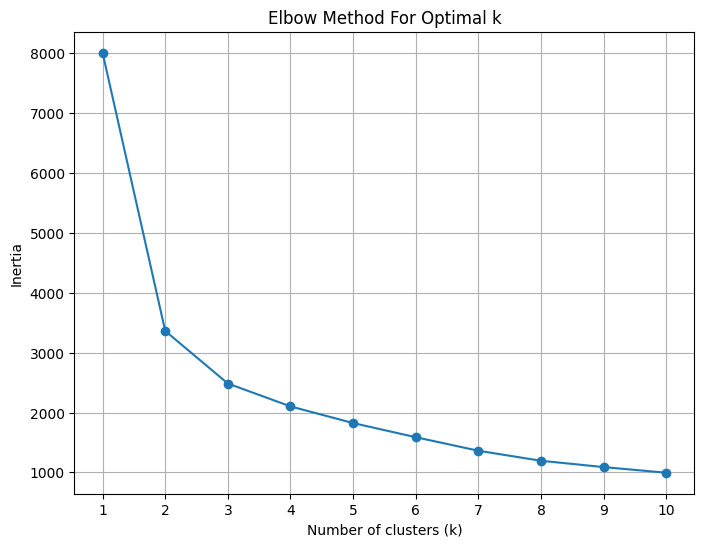

In [ ]:
#Elbow Approach

# Function to calculate KMeans inertia on the Gower distance matrix
def calculate_inertia(dist_matrix, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(dist_matrix)
        inertias.append(kmeans.inertia_)
    return inertias

# Determine the optimal number of clusters using the elbow method
max_k = 10
inertias = calculate_inertia(gower_dist, max_k)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [ ]:
#Applying the optimal k value to perform k-means clustering

# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)

# Perform KMeans clustering
# Number of clusters (k) - choose appropriate value
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model on the Gower distance matrix
kmeans.fit(gower_dist)

# Get cluster labels
labels = kmeans.labels_


df_with_clusters = df.copy()
df_with_clusters['cluster'] = labels


df_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Unnamed: 0,mode,msn_state,wind,gf,gf_pred,gf_act,kill_switch,mode_switch,throttle,max_deviation,max_altitude,duration,final_landing_state,freefall_occurred,mission_complete,cluster
0,0,OFFBOARD,Flying,None,Yes,No,Return mode,No,POSCTL,0.0,14.730856,8.435680,35.0,True,False,False,1
1,1,OFFBOARD,Flying,None,Yes,No,Hold mode,No,STABILIZED,225.0,14.761184,8.218861,87.0,True,False,False,1
2,2,OFFBOARD,Flying,None,Yes,No,Return mode,No,OFFBOARD,-100.0,0.160447,12.619712,76.0,True,False,True,1
3,3,OFFBOARD,Flying,None,Yes,No,Return mode,No,ALTCTL,260.0,14.789770,8.455968,87.0,True,False,False,1
4,4,OFFBOARD,Flying,None,Yes,No,Hold mode,No,ALTCTL,600.0,14.925705,16.143398,105.0,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,700,OFFBOARD,Takeoff,None,No,None,None,Yes,ALTCTL,None,34.769376,0.045367,88.0,True,False,False,2
701,701,OFFBOARD,Hover,None,No,None,None,Yes,STABILIZED,None,14.765467,12.156211,85.0,True,True,False,2
702,702,AUTO.LAND,Arm,None,No,None,None,Yes,AUTO.LAND,None,34.462637,0.040255,89.0,True,False,False,0
703,703,OFFBOARD,Takeoff,None,No,None,None,Yes,AUTO.LOITER,None,34.834306,0.012228,88.0,True,False,False,2


In [ ]:
df_with_clusters['cluster'].unique()

array([1, 0, 2], dtype=int32)

In [ ]:
# Calculate silhouette score to evaluate the clustering performance using distance matrix

sil_score = silhouette_score(gower_dist, labels, metric='precomputed')

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.3214961588382721


In [ ]:
# Assuming `df` is your DataFrame and `labels` are your cluster labels
# df = pd.DataFrame(...)  # Your actual data
# labels = ...            # Your actual cluster labels

# Convert categorical data to numeric (One-Hot Encoding)
#df = pd.get_dummies(df, drop_first=True)

# Ensure all data is numeric
#df = df.apply(pd.to_numeric, errors='coerce')

# Calinski-Harabasz Index using cleaned data
#ch_score = calinski_harabasz_score(df, labels)

# Davies-Bouldin Index using original data
#db_score = davies_bouldin_score(df, labels)

#print(f"Calinski-Harabasz Index: {ch_score}")
#print(f"Davies-Bouldin Index: {db_score}")

In [ ]:
# Calculate centroid coordinates
centroids = kmeans.cluster_centers_

# Initialize a list to store closest points to centroids
closest_points_to_centroids = []

# Find closest points to each centroid
for i, centroid in enumerate(centroids):
    # Calculate distances from each point to the centroid
    distances_to_centroid = gower_dist[:, i]
    # Find the index of the closest point
    closest_index = np.argmin(distances_to_centroid)
    # Get the point and its distance
    closest_point = df.iloc[closest_index]
    distance_to_centroid = distances_to_centroid[closest_index]
    # Append to list
    closest_points_to_centroids.append(closest_point)

# Convert the list of dictionaries to a DataFrame
closest_points_to_centroids_df = pd.DataFrame(closest_points_to_centroids)
closest_points_to_centroids_df

,Unnamed: 0,mode,msn_state,wind,gf,gf_pred,gf_act,kill_switch,mode_switch,throttle,max_deviation,max_altitude,duration,final_landing_state,freefall_occurred,mission_complete
0,0,OFFBOARD,Flying,None,Yes,No,Return mode,No,POSCTL,0.0,14.730856,8.435680,35.0,True,False,False
1,1,OFFBOARD,Flying,None,Yes,No,Hold mode,No,STABILIZED,225.0,14.761184,8.218861,87.0,True,False,False
2,2,OFFBOARD,Flying,None,Yes,No,Return mode,No,OFFBOARD,-100.0,0.160447,12.619712,76.0,True,False,True


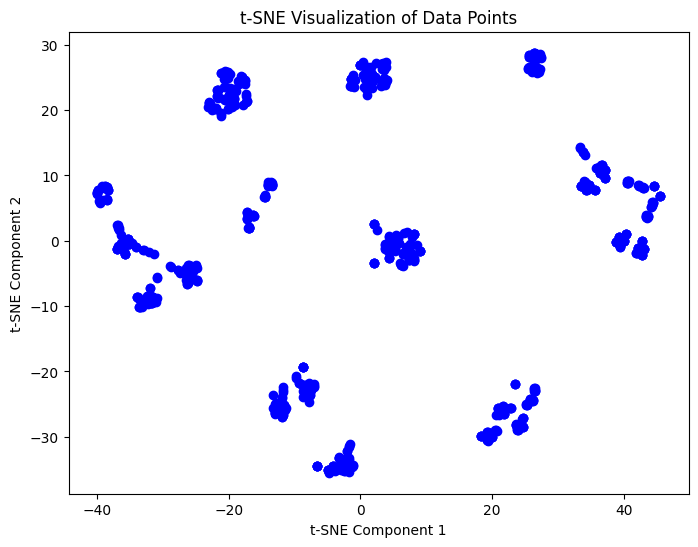

In [ ]:
# Vizualization with Gower

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(gower_dist)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue')
plt.title('t-SNE Visualization of Data Points')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



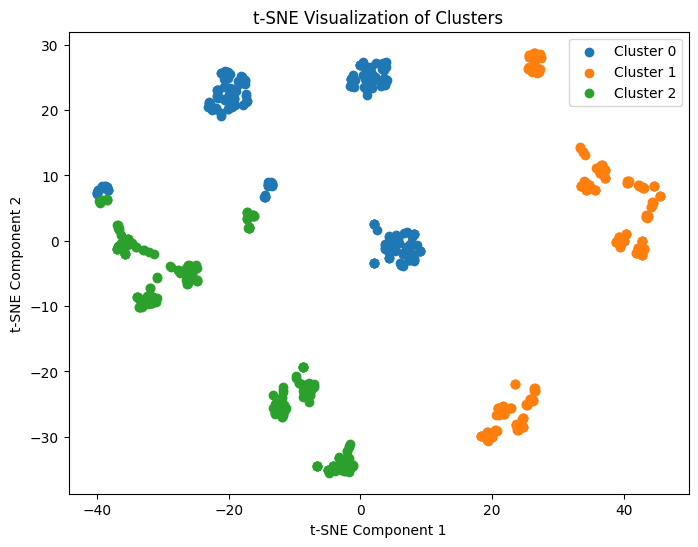

In [ ]:
# Visualization with Grower and KMeans clustering

# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)

# Perform KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(gower_dist)

# Get cluster labels
labels = kmeans.labels_

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(gower_dist)

# Visualize clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], label=f'Cluster {i}')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [ ]:
# Sample data for df (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)

# Perform KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(gower_dist)

# Get cluster labels
labels = kmeans.labels_

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(gower_dist)

# Normalize the points to project them onto a unit sphere
norms = np.linalg.norm(X_tsne, axis=1)
X_sphere = X_tsne / norms[:, np.newaxis]

# Compute the centroids for each cluster in the t-SNE space
centroids = np.array([X_tsne[labels == i].mean(axis=0) for i in range(k)])
# Normalize the centroids to project them onto the hypersphere
centroid_norms = np.linalg.norm(centroids, axis=1)
centroids_sphere = centroids / centroid_norms[:, np.newaxis]

# Create wireframe for the outline of the sphere
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2 * np.pi, 50)
phi, theta = np.meshgrid(phi, theta)
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Create traces for horizontal lines
horizontal_lines = []
for i in range(len(phi)):
    horizontal_lines.append(go.Scatter3d(
        x=x[i],
        y=y[i],
        z=z[i],
        mode='lines',
        line=dict(color='gray', width=0.4),
        opacity=1,
        showlegend=False
    ))

# Create traces for vertical lines
vertical_lines = []
for i in range(len(theta)):
    vertical_lines.append(go.Scatter3d(
        x=x[:, i],
        y=y[:, i],
        z=z[:, i],
        mode='lines',
        line=dict(color='gray', width=0.4),
        opacity=1,
        showlegend=False
    ))

# Create 3D scatter plot with Plotly
trace = []
for i in range(k):
    trace.append(go.Scatter3d(
        x=X_sphere[labels == i, 0],
        y=X_sphere[labels == i, 1],
        z=X_sphere[labels == i, 2],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {i}'
    ))

# Add cluster centroid indicators
centroid_trace = go.Scatter3d(
    x=centroids_sphere[:, 0],
    y=centroids_sphere[:, 1],
    z=centroids_sphere[:, 2],
    mode='markers',
    marker=dict(size=8, color='yellow', ),
    name='Cluster Centroids'
)

layout = go.Layout(
    title='3D t-SNE Visualization of Clusters on a Hypersphere with Sphere Outline',
    scene=dict(
        xaxis_title='t-SNE Component 1',
        yaxis_title='t-SNE Component 2',
        zaxis_title='t-SNE Component 3',
    )
)

# Combine the wireframe outline, scatter plot, and cluster centroids
fig = go.Figure(data=trace + horizontal_lines + vertical_lines + [centroid_trace], layout=layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df['throttle'] = pd.to_numeric(df['throttle'], errors='coerce')

In [ ]:
cluster_0 = df_with_clusters[df_with_clusters['cluster'] == 0].copy()
cluster_1 = df_with_clusters[df_with_clusters['cluster'] == 1].copy()
cluster_2 = df_with_clusters[df_with_clusters['cluster'] == 2].copy()
cluster_3 = df_with_clusters[df_with_clusters['cluster'] == 3].copy()
cluster_4 = df_with_clusters[df_with_clusters['cluster'] == 4].copy()
cluster_5 = df_with_clusters[df_with_clusters['cluster'] == 5].copy()
cluster_6 = df_with_clusters[df_with_clusters['cluster'] == 6].copy()
cluster_7 = df_with_clusters[df_with_clusters['cluster'] == 7].copy()
cluster_8 = df_with_clusters[df_with_clusters['cluster'] == 8].copy()
cluster_9 = df_with_clusters[df_with_clusters['cluster'] == 9].copy()
cluster_10 = df_with_clusters[df_with_clusters['cluster'] == 10].copy()




# Cluster 0

In [ ]:
unique_values_cluster_0 = cluster_0.apply(lambda x: x.unique())
print(f"Cluster 0 unique values")
print(unique_values_cluster_0)
print()
print()
print()
print(f"Data set unique values")
print(unique_values)

Cluster 0 unique values
Unnamed: 0             [160, 161, 162, 165, 166, 167, 168, 169, 170, ...
mode                                               [AUTO.LAND, OFFBOARD]
msn_state                            [Land, Disarm, Arm, Hover, Takeoff]
wind                                                     [None, 5 North]
gf                                                                  [No]
gf_pred                                                           [None]
gf_act                                                            [None]
kill_switch                                                    [No, Yes]
mode_switch            [AUTO.LOITER, AUTO.RTL, OFFBOARD, POSCTL, AUTO...
throttle               [0.0, 300.0, -100.0, 570.0, 260.0, 600.0, 450....
max_deviation          [0.26652465, 0.288646202, 0.285423465, 0.21795...
max_altitude           [12.873619, 12.774446, 12.803539, 12.810847, 1...
duration               [77.0, 87.0, 76.0, 88.0, 130.0, 80.0, 75.0, 91...
final_landing_state        

In [ ]:
cluster_0_mode_switch_values = sorted(unique_values_cluster_0['mode_switch'])

print(f"Cluster 0 mode switch values")
print(cluster_0_mode_switch_values)
print()
df_mode_switch()
# print(f"Mode switch values for data set")
# print(mode_switch_values)

Cluster 0 mode switch values
['ALTCTL', 'AUTO.LAND', 'AUTO.LOITER', 'AUTO.RTL', 'OFFBOARD', 'POSCTL', 'STABILIZED']

Mode switch values for Data set
['ALTCTL', 'AUTO.LAND', 'AUTO.LOITER', 'AUTO.RTL', 'OFFBOARD', 'POSCTL', 'STABILIZED']


In [ ]:
cluster_0['throttle'] = pd.to_numeric(df['throttle'], errors='coerce')
min_value = cluster_0['throttle'].min()
max_value = cluster_0['throttle'].max()

cluster_0_throttle_range = (f"{min_value} to {max_value}")
cluster_0_throttle_values = sorted(cluster_0['throttle'].unique())


print(f"Cluster 0 throttle range")
print(cluster_0_throttle_range)
print()
print(f"Cluster 0 throttle values")
print(sorted(cluster_0_throttle_values))
print()
df_throttle()
# print(f"Data set throttle range")
# print(throttle_range)
# print()
# print(f"Data set throttle values")
# print(throttle_values)

Cluster 0 throttle range
-100.0 to 615.0

Cluster 0 throttle values
[-100.0, 0.0, 100.0, 225.0, 260.0, 300.0, 435.0, 445.0, 450.0, 550.0, 570.0, 600.0, 615.0, nan]

Throttle range for Data set
-100.0 to 615.0

Throttle values for Data set
[-100.0, 0.0, 100.0, 225.0, 260.0, 300.0, 435.0, 445.0, 450.0, 550.0, 570.0, 600.0, 615.0, nan]


In [ ]:
min_value = cluster_0['max_deviation'].min()
max_value = cluster_0['max_deviation'].max()

cluster_0_max_deviation_range = (f"{min_value} to {max_value}")
cluster_0_max_deviation_values = (sorted(cluster_0['max_deviation'].unique()))

print(f"Cluster 0 max deviation range")
print(cluster_0_max_deviation_range)
print()
print(f"Cluster 0 max deviation values")
print(cluster_0_max_deviation_values)
print()
df_max_deviation()
# print(f"Data set max deviaiton range")
# print(max_deviation_range)
# print()
# print(f"Data set max deviation values")
# print(max_deviation_values)

Cluster 0 max deviation range
0.0095919999999978 to 34.9259709

Cluster 0 max deviation values
[0.0095919999999978, 0.0097389999999997, 0.0099160000000004, 0.0099659999999985, 0.0101300000000001, 0.0109630000000038, 0.0175830000000019, 0.02804394, 0.0403900000000021, 0.0578984, 0.0637469999999993, 0.07641567, 0.07860011, 0.0793189999999981, 0.0818071, 0.0828203, 0.0831854999999999, 0.08574145, 0.0898201999999999, 0.0910948999999999, 0.0953961999999999, 0.0980958, 0.0981248999999999, 0.0995337499999999, 0.10365257, 0.1045928, 0.10604796, 0.10951187, 0.11116877, 0.11283, 0.1146293, 0.11677837, 0.11843358, 0.11904867, 0.11913258, 0.11924049, 0.1220747, 0.12212567, 0.1251667, 0.13053657, 0.1335812, 0.1343233, 0.1367094, 0.13768527, 0.14185968, 0.1428602, 0.14373575, 0.14488229, 0.14715314, 0.14803953, 0.14832823, 0.14967012, 0.15078814, 0.15113883, 0.15267307, 0.15445997, 0.15833886, 0.16121513, 0.1612801, 0.1617437, 0.16252942, 0.16280513, 0.16300036, 0.16440612, 0.1651516, 0.16695842, 0.

In [ ]:
min_value = cluster_0['max_altitude'].min()
max_value = cluster_0['max_altitude'].max()

cluster_0_max_altitude_range = (f"{min_value} to {max_value}")
cluster_0_max_altitude_values = (sorted(cluster_0['max_altitude'].unique()))

print(f"Cluster 0 max altitude range")
print(cluster_0_max_altitude_range)
print()
print(f"Cluster 0 max altitude values")
print(cluster_0_max_altitude_values)
print()
df_max_altitude()
# print(f"Data set max altitude range")
# print(max_altitude_range)
# print()
# print(f"Data set max altitude values")
# print(max_altitude_values)

Cluster 0 max altitude range
8.634119e-05 to 13.012042

Cluster 0 max altitude values
[8.634119e-05, 0.016029352, 0.021983515, 0.03671271, 0.040255275, 0.0794536, 0.106898904, 0.11366269, 0.120542064, 0.14582232, 0.2543773, 12.544518, 12.579341, 12.5796, 12.585125, 12.587199, 12.59226, 12.592866, 12.593258, 12.597263, 12.602525, 12.610348, 12.626176, 12.627285, 12.635285, 12.639913, 12.641703, 12.6423435, 12.643168, 12.646459, 12.648356, 12.649356, 12.649658, 12.65032, 12.652211, 12.65777, 12.664497, 12.664678, 12.666765, 12.666777, 12.671239, 12.672102, 12.674323, 12.676283, 12.676505, 12.677116, 12.677693, 12.680606, 12.681746, 12.68272, 12.683131, 12.685988, 12.686731, 12.690569, 12.692475, 12.693064, 12.694741, 12.70067, 12.701108, 12.701137, 12.701367, 12.704027, 12.707657, 12.711396, 12.711744, 12.715485, 12.715922, 12.719756, 12.720429, 12.720901, 12.721429, 12.721849, 12.72368, 12.725989, 12.727707, 12.728328, 12.728352, 12.730863, 12.731468, 12.732008, 12.732869, 12.733995, 12

In [ ]:
min_value = cluster_0['duration'].min()
max_value = cluster_0['duration'].max()

cluster_0_duration_range = (f"{min_value} to {max_value}")
cluster_0_duration_values = sorted(cluster_0['duration'].unique())
print(f"Cluster 0 duration range")
print(cluster_0_duration_range)
print()
print(f"Cluster 0 duration values")
#print(sorted(cluster_0['duration'].unique()))
print(cluster_0_duration_values)
print()
df_duration()


Cluster 0 duration range
75.0 to 40178.0

Cluster 0 duration values
[75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 94.0, 95.0, 97.0, 98.0, 100.0, 106.0, 130.0, 179.0, 193.0, 40178.0]

Duration range for Data set
10.0 to 40178.0

Duration values for Data set
[10.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 35.0, 37.0, 39.0, 41.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 55.0, 58.0, 59.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 117.0, 119.0, 122.0, 128.0, 129.0, 130.0, 132.0, 134.0, 135.0, 143.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 160.0, 162.0, 164.0, 166.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 178.0, 179.0, 185.0, 188.0, 193.0, 194.0,